<a href="https://colab.research.google.com/github/Team-No-3/Hand_sign_language/blob/main/05_2_yolo_v7_inference(CPU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#yolov7 다운로드
!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 998, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 998 (delta 0), reused 2 (delta 0), pack-reused 994
Receiving objects: 100% (998/998), 69.70 MiB | 31.18 MiB/s, done.
Resolving deltas: 100% (493/493), done.


In [3]:
import sys

In [4]:
#yolov7 다운로드 받은 폴더를 path 설정
sys.path.append("/content/yolov7")

In [5]:
import torch

import os
from utils.datasets import letterbox
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from utils.general import non_max_suppression, scale_coords
from models.experimental import attempt_load

In [6]:
#yolov7의 weight 파일의 경로
weight_path = "/content/drive/MyDrive/manufacturing_bigdata/06.project02/yolov7_tiny_cpu.pt"
device = "cpu"

In [7]:
#device 설정 cuda 혹은 cpu
device = torch.device("cpu")
#weight 파일을 읽어서 리턴
weigths = torch.load(weight_path)
#weight 파일의 모델을 읽어서 리턴
model = weigths['model']

In [8]:
#모델을 cpu 혹은 gpu에 저장함
model = model.float().to(device)
#모델을 실행할 준비를 함
_ = model.eval()

In [9]:
print("model = ", model) 

model =  Model(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (2): Conv(
      (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (3): Conv(
      (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
     

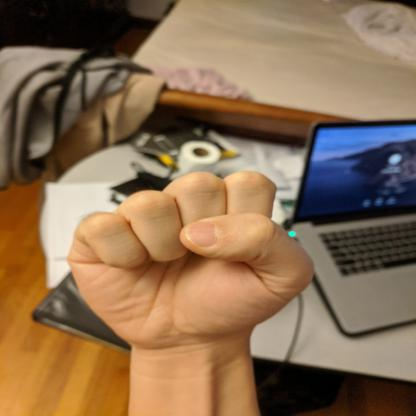

In [10]:
#이미지 경로
img = '/content/drive/MyDrive/manufacturing_bigdata/06.project02/yolov7_test.jpg'
#세포 이미지를 읽어서 img_arr에 저장
img_arr  = cv2.imread(img)

#이미지 출력
cv2_imshow(img_arr)

In [11]:
image_height, image_width = img_arr.shape[0:2] #이미지 높이, 이미지 너비 리턴
print("image_height =", image_height) 
print("image_width =", image_width)

image_height = 416
image_width = 416


In [12]:
#BGR -> RGB로 변환
image = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

In [13]:
img_arr

array([[[  9,  10,  20],
        [  8,   9,  19],
        [  7,   8,  18],
        ...,
        [  6,   3,   0],
        [  7,   4,   0],
        [  8,   5,   0]],

       [[ 10,  11,  21],
        [ 10,  11,  21],
        [  9,  10,  20],
        ...,
        [  6,   5,   1],
        [  7,   6,   2],
        [  8,   8,   2]],

       [[ 13,  14,  24],
        [ 12,  13,  23],
        [ 11,  12,  22],
        ...,
        [  5,   6,   4],
        [  4,   5,   3],
        [  4,   5,   1]],

       ...,

       [[ 79, 159, 230],
        [ 79, 159, 230],
        [ 79, 159, 230],
        ...,
        [  7,  24,  43],
        [  7,  24,  43],
        [  7,  24,  43]],

       [[ 80, 160, 231],
        [ 80, 160, 231],
        [ 80, 160, 231],
        ...,
        [  5,  25,  43],
        [  7,  25,  42],
        [  7,  25,  42]],

       [[ 80, 160, 231],
        [ 80, 160, 231],
        [ 80, 160, 231],
        ...,
        [  4,  24,  42],
        [  7,  25,  42],
        [  7,  25,  42]]

In [14]:
# #이미지를 tensor타입으로 변환할 준비를 함
image = transforms.ToTensor()(img_arr)
# #이미지를 pytorch 이미지 객체로 변환
image = torch.tensor(np.array([image.numpy()]))
# #이미지를 gpu 혹은 cpu에 저장할 준비를 함
image = image.to(device)
# #이미지를 gpu 혹은 cpu에 저장
# #image = image.half()
image = image.float()

In [15]:
image

tensor([[[[0.03529, 0.03137, 0.02745,  ..., 0.02353, 0.02745, 0.03137],
          [0.03922, 0.03922, 0.03529,  ..., 0.02353, 0.02745, 0.03137],
          [0.05098, 0.04706, 0.04314,  ..., 0.01961, 0.01569, 0.01569],
          ...,
          [0.30980, 0.30980, 0.30980,  ..., 0.02745, 0.02745, 0.02745],
          [0.31373, 0.31373, 0.31373,  ..., 0.01961, 0.02745, 0.02745],
          [0.31373, 0.31373, 0.31373,  ..., 0.01569, 0.02745, 0.02745]],

         [[0.03922, 0.03529, 0.03137,  ..., 0.01176, 0.01569, 0.01961],
          [0.04314, 0.04314, 0.03922,  ..., 0.01961, 0.02353, 0.03137],
          [0.05490, 0.05098, 0.04706,  ..., 0.02353, 0.01961, 0.01961],
          ...,
          [0.62353, 0.62353, 0.62353,  ..., 0.09412, 0.09412, 0.09412],
          [0.62745, 0.62745, 0.62745,  ..., 0.09804, 0.09804, 0.09804],
          [0.62745, 0.62745, 0.62745,  ..., 0.09412, 0.09804, 0.09804]],

         [[0.07843, 0.07451, 0.07059,  ..., 0.00000, 0.00000, 0.00000],
          [0.08235, 0.08235, 0

In [16]:
#이미지에서 객체 detect 실행해서 결과를 output에 저장
output,_ = model(image)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [17]:
#객체 detect 한 결과
print("output = ", output)

output =  tensor([[[7.42972e+00, 1.11201e+01, 3.99866e+01,  ..., 1.88428e-02, 6.24792e-02, 6.21518e-03],
         [1.49611e+01, 9.29175e+00, 3.99901e+01,  ..., 2.00073e-02, 5.08795e-02, 5.87849e-03],
         [1.85872e+01, 9.89476e+00, 3.99808e+01,  ..., 1.28597e-02, 4.74729e-02, 9.42294e-03],
         ...,
         [3.34582e+02, 3.89756e+02, 2.01321e+02,  ..., 1.60925e-02, 3.77362e-02, 2.85103e-02],
         [3.53615e+02, 3.89566e+02, 1.62442e+02,  ..., 2.07385e-02, 2.36675e-02, 3.58624e-02],
         [3.91791e+02, 3.91184e+02, 1.71401e+02,  ..., 3.17081e-02, 5.11218e-02, 3.97929e-02]]])


In [18]:
#확률 0.25 이상 iou 0.45 이하인 예측값만 리턴
pred = non_max_suppression(output)

In [19]:
print("pred = ", pred)

pred =  [tensor([[ 56.73621, 159.61356, 321.79105, 358.93405,   0.94245,  18.00000]])]


In [20]:
print("pred = ", pred[0])

pred =  tensor([[ 56.73621, 159.61356, 321.79105, 358.93405,   0.94245,  18.00000]])


In [ ]:
#클래스 텍스트
class_text = "abcdefghijklmnopqrstuvwxyz"

In [ ]:
#확률 0.25 이상 iou 0.45 이하인 예측값만 리턴
pred = non_max_suppression(output)[0]

#pred에 저장된 예측값을 순서대로 det 에 대입
for det in pred:
    #바운딩 박스의 left, top, 너비, 높이 리턴
    x, y, box_width,box_height = det[0:4]
    #예측 확률
    prop = det[4]
    #클래스 숫자
    class_id = det[5]
    #클래스 숫자를 문자열로 변환
    class_label = class_text[int(class_id)]
    #바운딩 박스 그림
    cv2.rectangle(
              img_arr, #이미지
              (int(x), int(y)), #바운딩 박스 letf, top
              (int(x + box_width), int(y + box_height)), #바운딩 박스의 right, bottom
              (255, 0, 0), #바운딩 박스 색깔
              2 #바운딩 박스 두께
          )
    #텍스트 추가
    cv2.putText(
        img_arr , #이미지
        class_label +" "+ str(prop.cpu().numpy())+"%", #추가할 텍스트
        (int(x), int(y) - 10), #텍스트 좌표 
        cv2.FONT_HERSHEY_SIMPLEX , #폰트
        1, #글자 크기
        (255,0,0), #글자색
        2 #글자 두께
        )

    

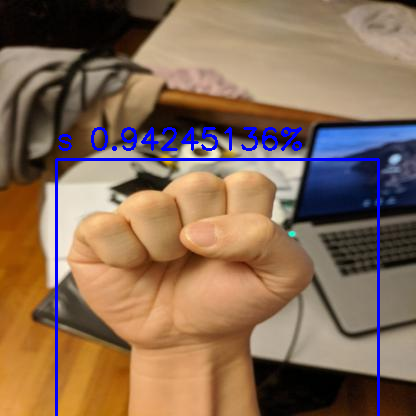

In [ ]:
#이미지 출력
cv2_imshow(img_arr)